In [1]:
import pandas as pd

file_path = '../data/DoS-Wednesday-no-metadata.parquet'

try:
    # Note: we use read_parquet instead of read_csv
    df = pd.read_parquet(file_path)
    print("Success! Parquet file uploaded.")
    
    # Check the dataset dimensions (number of rows and columns)
    print(f"Dataset has {df.shape[0]} rows and {df.shape[1]} columns")
    
    # Display the first rows
    display(df.head())
except Exception as e:
    print(f"Error: {e}")

Success! Parquet file uploaded.
Dataset has 584991 rows and 78 columns


,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,6,38308,1,1,6,6,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
1,6,479,11,5,172,326,79,0,15.636364,31.449238,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Benign
2,6,1095,10,6,3150,3150,1575,0,315.000000,632.561646,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Benign
3,6,15206,17,12,3452,6660,1313,0,203.058823,425.778473,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Benign
4,6,1092,9,6,3150,3152,1575,0,350.000000,694.509705,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Benign


In [2]:
# Count occurrences for each traffic type
label_counts = df['Label'].value_counts()
print("Traffic distribution:")
print(label_counts)

# Compute percentages
print("\nPercentage distribution:")
print(df['Label'].value_counts(normalize=True) * 100)

Traffic distribution:
Label
Benign              391235
DoS Hulk            172846
DoS GoldenEye        10286
DoS slowloris         5385
DoS Slowhttptest      5228
Heartbleed              11
Name: count, dtype: int64

Percentage distribution:
Label
Benign              66.878807
DoS Hulk            29.546779
DoS GoldenEye        1.758318
DoS slowloris        0.920527
DoS Slowhttptest     0.893689
Heartbleed           0.001880
Name: proportion, dtype: float64


In [3]:
# Check if there are missing values
print("Missing values across all columns:")
print(df.isnull().sum().sum())

# Check data types (to ensure all features are numeric)
# Most of them should be float64 or int64
print("\nData types:")
print(df.dtypes.value_counts())

Missing values across all columns:
0

Data types:
int32       26
float32     22
int8        21
int16        6
float64      2
category     1
Name: count, dtype: int64


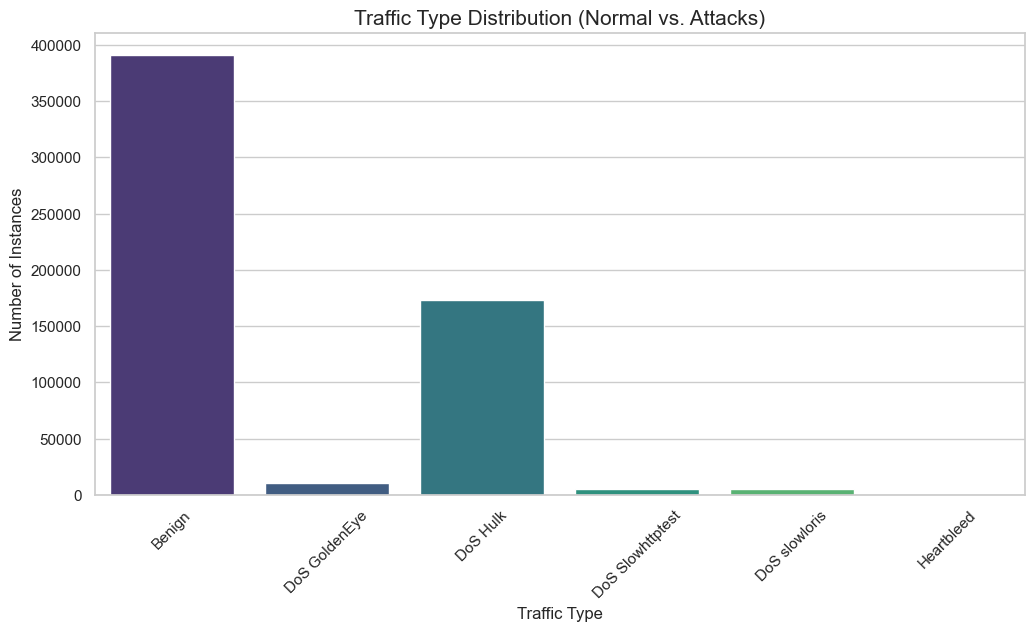

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot style
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")

# Create the distribution plot
ax = sns.countplot(data=df, x='Label', hue='Label', palette='viridis', legend=False)

# Add titles and labels
plt.title('Traffic Type Distribution (Normal vs. Attacks)', fontsize=15)
plt.xlabel('Traffic Type', fontsize=12)
plt.ylabel('Number of Instances', fontsize=12)
plt.xticks(rotation=45)

plt.savefig('../data/class_distribution.png', dpi=300, bbox_inches='tight')

plt.show()


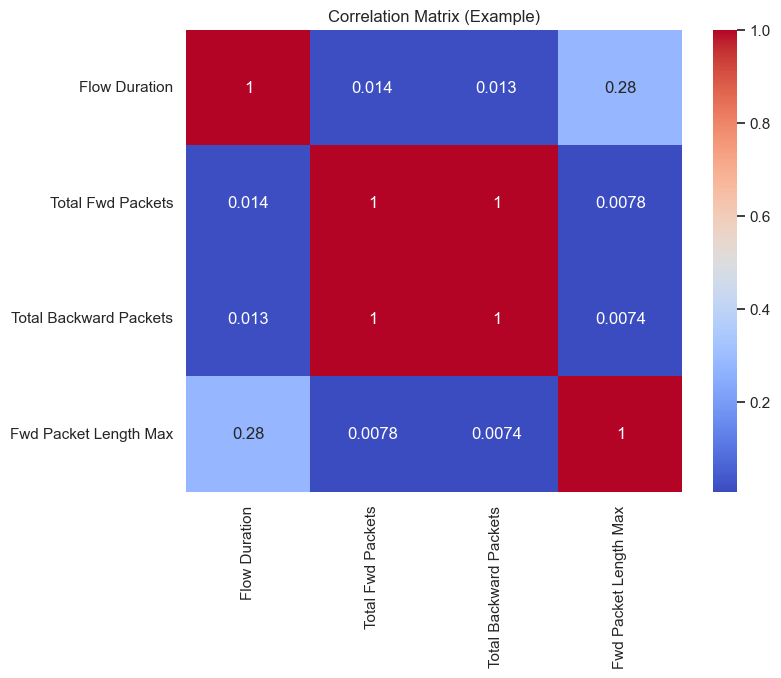

In [11]:
# Select only a few numeric columns to avoid cluttering the plot
cols_to_check = ['Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Fwd Packet Length Max']
correlation_matrix = df[cols_to_check].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (Example)')
plt.savefig('../data/plots/correlation_matrix', dpi=300, bbox_inches='tight')
plt.show()


In [6]:
# Creăm un tabel nou care conține DOAR atacurile Hulk
hulk_attacks = df[df['Label'] == 'DoS Hulk']

# Vedem statistici doar pentru aceste atacuri
print(f"Durata medie a unui atac Hulk: {hulk_attacks['Flow Duration'].mean()}")

Durata medie a unui atac Hulk: 76310925.08817098


In [7]:
# Create a new table containing ONLY Hulk attacks
hulk_attacks = df[df['Label'] == 'DoS Hulk']

# View statistics only for these attacks
print(f"Average duration of a Hulk attack: {hulk_attacks['Flow Duration'].mean()}")

Average duration of a Hulk attack: 76310925.08817098


In [8]:
# 1. Identify columns with a single unique value (zero variance)
constant_columns = [col for col in df.columns if df[col].nunique() <= 1]

print(f"Found {len(constant_columns)} useless (constant) columns:")
print(constant_columns)

# 2. Drop these columns from our main table
df.drop(columns=constant_columns, inplace=True)

print(f"\nSuccess! We now have {df.shape[1]} columns left.")

Found 10 useless (constant) columns:
['Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'CWE Flag Count', 'Fwd Avg Bytes/Bulk', 'Fwd Avg Packets/Bulk', 'Fwd Avg Bulk Rate', 'Bwd Avg Bytes/Bulk', 'Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate']

Success! We now have 68 columns left.


In [9]:
# After df.drop(...), save the cleaned version to a new file
output_path = '../data/DoS-Wednesday-CLEANED.parquet'
df.to_parquet(output_path)
print(f"Cleaned file saved to: {output_path}")

Cleaned file saved to: ../data/DoS-Wednesday-CLEANED.parquet
